contour detection

In [34]:
import cv2
import os

def process_and_save_contours(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        
    # Walk through the input folder's subfolders and files
    for root, subfolders, files in os.walk(input_folder):
        for subfolder in subfolders:
            subfolder_path = os.path.join(root, subfolder)
            output_subfolder_path = os.path.join(output_folder, subfolder)
            
            # Create corresponding subfolder in output directory
            if not os.path.exists(output_subfolder_path):
                os.makedirs(output_subfolder_path)
                
            # Process each image in the subfolder
            for file in os.listdir(subfolder_path):
                input_image_path = os.path.join(subfolder_path, file)
                output_image_path = os.path.join(output_subfolder_path, file)
                
                # Read and process the image (extracting contours)
                image = cv2.imread(input_image_path)
                if image is None:
                    print(f"Could not read {input_image_path}. Skipping...")
                    continue
                
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                blurred = cv2.GaussianBlur(gray, (5, 5), 0)     # Apply Gaussian blur
                _, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)  # Thresholding
                contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                # Create a blank grayscale image to draw contours on
                contour_image = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)  # To allow contour drawing in grayscale
                cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 1)  # Draw white contours
                
                # Convert the resulting image back to pure grayscale for saving
                contour_image_gray = cv2.cvtColor(contour_image, cv2.COLOR_BGR2GRAY)
                
                # Save the grayscale contour image
                cv2.imwrite(output_image_path, contour_image_gray)
                print(f"Processed and saved: {output_image_path}")

# Provide input and output folder paths here
input_folder = "./Dataset"   # Path to the main folder with subfolders (classes)
output_folder = "./Dataset_contures_gray"  # Path where you want to save contour images

process_and_save_contours(input_folder, output_folder)


Processed and saved: ./Dataset_contures_gray/Healthy/20211231_162407 (Custom).jpg
Processed and saved: ./Dataset_contures_gray/Healthy/20211231_155345 (Custom).jpg
Processed and saved: ./Dataset_contures_gray/Healthy/20211231_124155 (Custom).jpg
Processed and saved: ./Dataset_contures_gray/Healthy/20211231_124641 (Custom).jpg
Processed and saved: ./Dataset_contures_gray/Healthy/20211231_155556 (Custom).jpg
Processed and saved: ./Dataset_contures_gray/Healthy/20211231_125037 (Custom).jpg
Processed and saved: ./Dataset_contures_gray/Healthy/20211231_125206 (Custom).jpg
Processed and saved: ./Dataset_contures_gray/Healthy/20211231_155927 (Custom).jpg
Processed and saved: ./Dataset_contures_gray/Healthy/20211231_160945 (Custom).jpg
Processed and saved: ./Dataset_contures_gray/Healthy/20211231_124721 (Custom).jpg
Processed and saved: ./Dataset_contures_gray/Healthy/20211231_160802 (Custom).jpg
Processed and saved: ./Dataset_contures_gray/Healthy/20211231_161545 (Custom).jpg
Processed and sa

Loading dataset and extracting features...
Processing class: Healthy
Processing class: Diseased
Balancing the dataset...

Training and evaluating RandomForestClassifier...
RandomForestClassifier Cross-Validation Accuracy: 88.5%
RandomForestClassifier Cross-Validation F1 Score: 0.88
RandomForestClassifier Test Accuracy: 91.5%
RandomForestClassifier Test F1 Score: 0.91
Confusion Matrix:
[[ 82  14]
 [  3 101]]
Classification Report:
              precision    recall  f1-score   support

    Diseased       0.96      0.85      0.91        96
     Healthy       0.88      0.97      0.92       104

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200


Training and evaluating SVC...
SVC Cross-Validation Accuracy: 85.12%
SVC Cross-Validation F1 Score: 0.85
SVC Test Accuracy: 88.0%
SVC Test F1 Score: 0.88
Confusion Matrix:
[[ 76  20]
 [  4 100]]
Classification Report:
              precis

/home/kafi/miniforge3/envs/mango/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kafi/miniforge3/envs/mango/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

LogisticRegression Cross-Validation Accuracy: 86.0%
LogisticRegression Cross-Validation F1 Score: 0.86
LogisticRegression Test Accuracy: 90.5%
LogisticRegression Test F1 Score: 0.9
Confusion Matrix:
[[86 10]
 [ 9 95]]
Classification Report:
              precision    recall  f1-score   support

    Diseased       0.91      0.90      0.90        96
     Healthy       0.90      0.91      0.91       104

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200



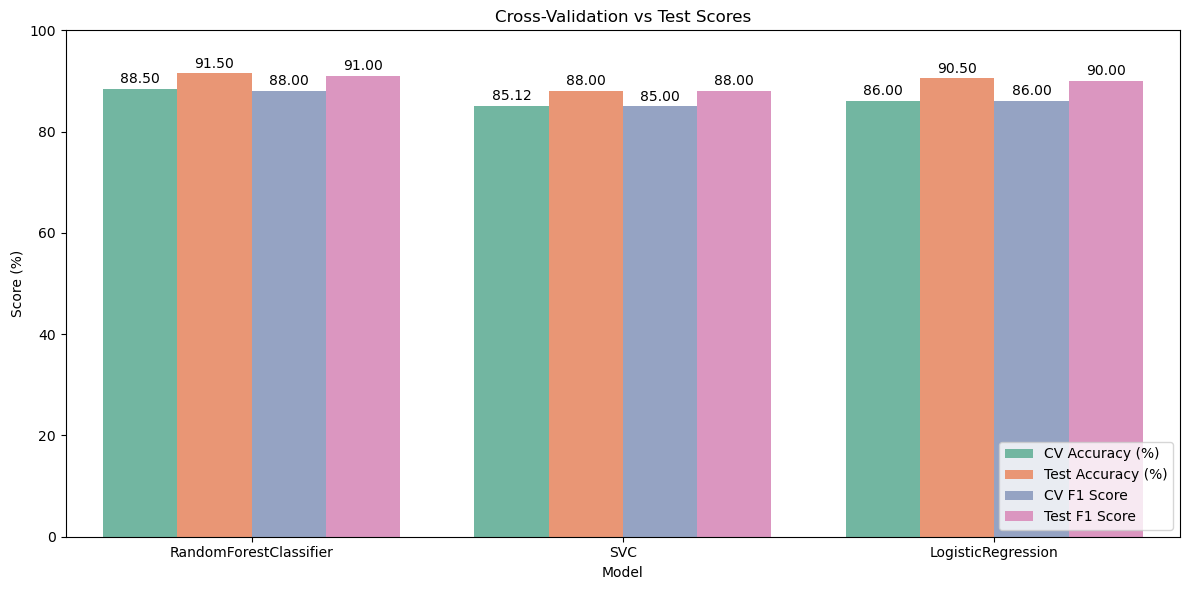

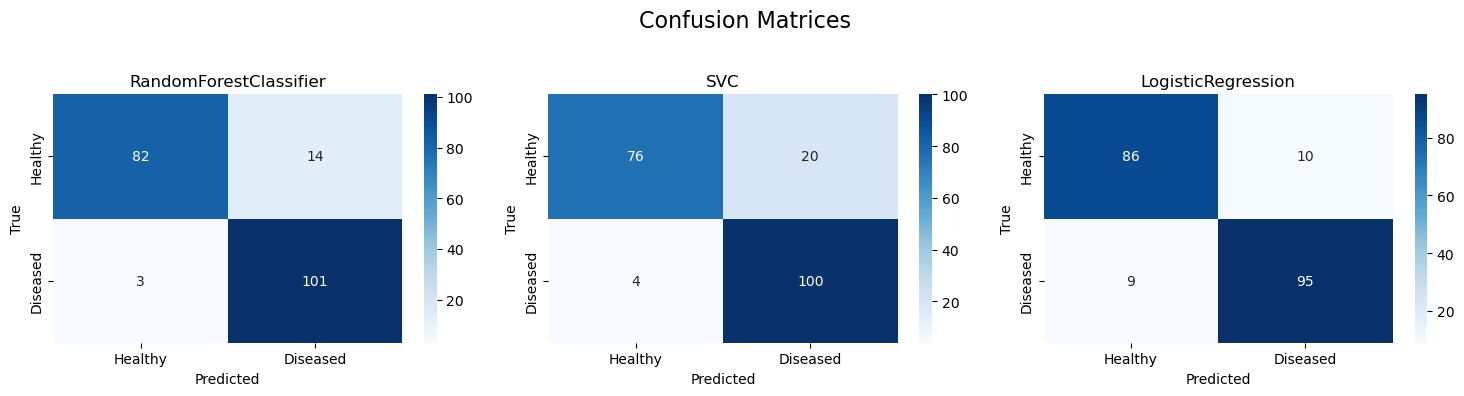

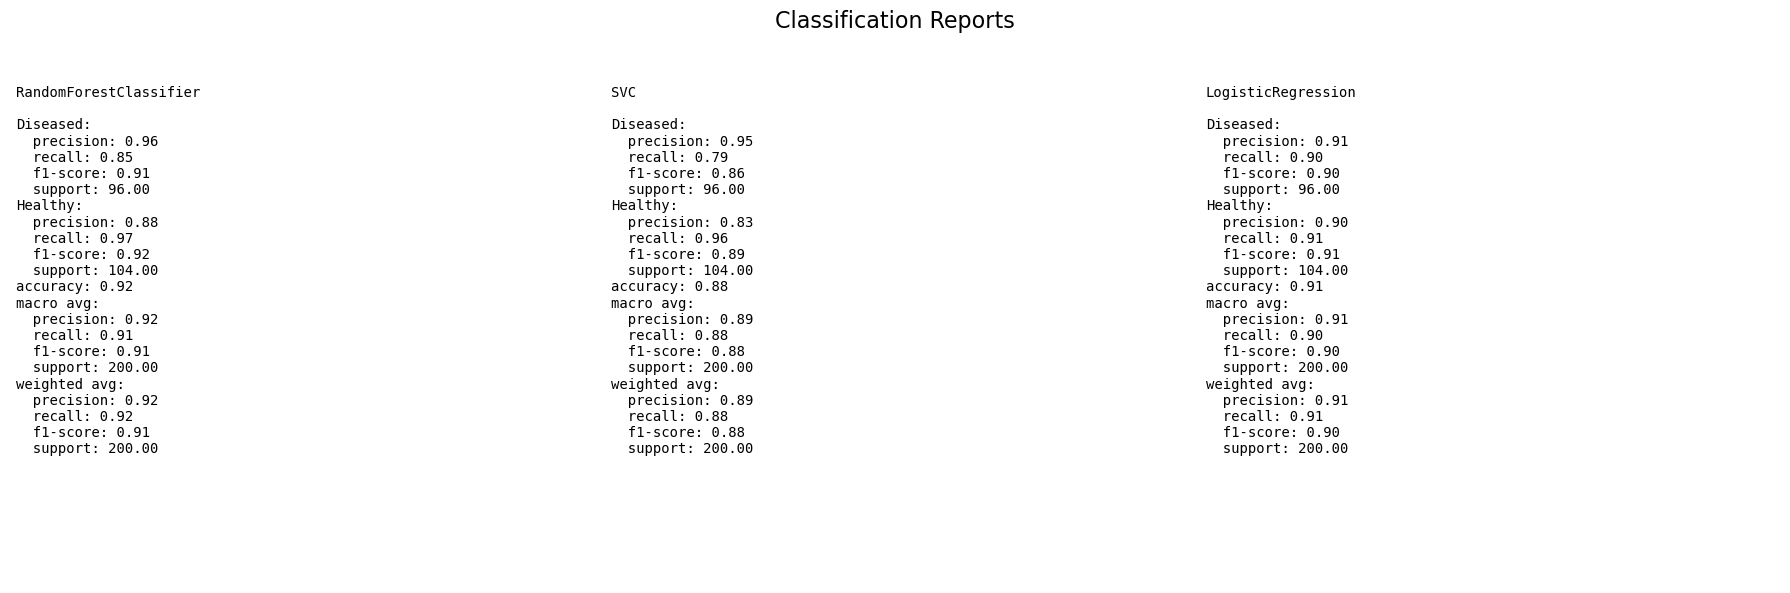

In [ ]:
import cv2
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix
from skimage.feature import local_binary_pattern
import joblib 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import numpy as np
from skimage.feature import hog

def process_image(image_path, image_size=32):
    """
    Reads, resizes, and preprocesses a grayscale contour image.
    Extracts features including flattened pixels, LBP, Hu Moments, and HOG.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None

    # Resize image to a fixed size (32x32)
    image_resized = cv2.resize(image, (image_size, image_size))
    image_normalized = image_resized / 255.0  # Normalize pixel intensities

    # Flattened pixel intensities
    flat_features = image_normalized.flatten()

    # Convert to uint8 for LBP and HOG
    image_uint8 = (image_normalized * 255).astype(np.uint8)

    # Extract Local Binary Pattern (LBP) features
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(image_uint8, n_points, radius, method="uniform")
    n_bins = int(lbp.max() + 1)
    lbp_hist, _ = np.histogram(lbp, bins=n_bins, range=(0, n_bins))
    lbp_hist_normalized = lbp_hist.astype("float") / lbp_hist.sum()

    # Extract Hu Moments (shape-based features)
    moments = cv2.moments(image_normalized)
    hu_moments = cv2.HuMoments(moments).flatten()

    # Extract HOG features (captures shape and texture)
    hog_features, _ = hog(image_uint8, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), 
                          block_norm='L2-Hys', visualize=True)

    # Concatenate all features (pixels, LBP, Hu Moments, HOG)
    combined_features = np.concatenate([flat_features, lbp_hist_normalized, hu_moments, hog_features])

    return combined_features



def load_dataset(input_folder):
    """
    Loads all images from subfolders, extracts features, and assigns labels.
    Assumes each subfolder name represents a class label.
    """
    features = []
    labels = []
    feature_length = None  # Keep track of feature vector length
    
    for subfolder in os.listdir(input_folder):
        subfolder_path = os.path.join(input_folder, subfolder)
        if os.path.isdir(subfolder_path):
            print(f"Processing class: {subfolder}")
            for file in os.listdir(subfolder_path):
                file_path = os.path.join(subfolder_path, file)
                image_features = process_image(file_path)
                if image_features is not None:
                    if feature_length is None:
                        feature_length = len(image_features)
                    elif len(image_features) != feature_length:
                        continue  # Skip this image if feature length is inconsistent
                    features.append(image_features)
                    labels.append(subfolder)  # Use subfolder name as the class label
    
    return np.array(features), np.array(labels)


def balance_dataset(features, labels):
    """
    Balances the dataset by undersampling the majority class.
    """
    # Separate the classes
    diseased_features = features[labels == "Diseased"]
    healthy_features = features[labels == "Healthy"]

    # Calculate the size of the smaller class
    min_samples = min(len(diseased_features), len(healthy_features))

    # Undersample the majority class to balance the dataset
    diseased_features_downsampled = resample(diseased_features, 
                                             replace=False,  # Without replacement
                                             n_samples=min_samples, 
                                             random_state=42)

    healthy_features_downsampled = resample(healthy_features, 
                                            replace=False,
                                            n_samples=min_samples, 
                                            random_state=42)

    # Combine the balanced datasets
    balanced_features = np.vstack((diseased_features_downsampled, healthy_features_downsampled))
    balanced_labels = np.array(["Diseased"] * min_samples + ["Healthy"] * min_samples)

    return balanced_features, balanced_labels

from sklearn.ensemble import RandomForestClassifier
def train_and_evaluate(features, labels, cv=5):
    """
    Splits dataset, trains multiple classifiers with cross-validation,
    evaluates on test set, saves models and prints metrics.
    
    Returns:
        results (dict): Metrics for each model.
    """
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, test_size=0.2, random_state=42
    )

    # Feature scaling for SVC and LogisticRegression
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    models = {
        'RandomForestClassifier': RandomForestClassifier(
            n_estimators=150, max_depth=10, max_features='sqrt', criterion='entropy'
        ),
        'SVC': SVC(),
        'LogisticRegression': LogisticRegression()
    }

    results = {}

    for name, model in models.items():
        print(f"\nTraining and evaluating {name}...")

        # # Use scaled data for SVC and LogisticRegression
        # if name in ['SVC', 'LogisticRegression']:
        #     X_tr, X_te = X_train_scaled, X_test_scaled
        # else:
        X_tr, X_te = X_train, X_test

        # Cross-validation on training set
        cv_acc = cross_val_score(model, X_tr, y_train, cv=cv, scoring='accuracy')
        cv_f1 = cross_val_score(model, X_tr, y_train, cv=cv, scoring='f1_weighted')

        # Fit on full training set and predict test set
        model.fit(X_tr, y_train)
        y_pred = model.predict(X_te)

        test_acc = model.score(X_te, y_test)
        test_f1 = f1_score(y_test, y_pred, average='weighted')
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

        # Save model
        joblib.dump(model, f'{name}.pkl')

        # Store results
        results[name] = {
            'CV Accuracy Mean (%)': round(np.mean(cv_acc)*100, 2),
            'CV F1 Mean': round(np.mean(cv_f1), 2),
            'Test Accuracy (%)': round(test_acc*100, 2),
            'Test F1 Score': round(test_f1, 2),
            'Confusion Matrix': cm,
            'Classification Report': report
        }

        # Print summary
        print(f"{name} Cross-Validation Accuracy: {results[name]['CV Accuracy Mean (%)']}%")
        print(f"{name} Cross-Validation F1 Score: {results[name]['CV F1 Mean']}")
        print(f"{name} Test Accuracy: {results[name]['Test Accuracy (%)']}%")
        print(f"{name} Test F1 Score: {results[name]['Test F1 Score']}")
        print("Confusion Matrix:")
        print(cm)
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

    return results, models

def plot_cv_vs_test_scores(results):
    data = []

    for model_name, metrics in results.items():
        data.append({'Model': model_name, 'Metric': 'CV Accuracy (%)', 'Score': metrics['CV Accuracy Mean (%)']})
        data.append({'Model': model_name, 'Metric': 'Test Accuracy (%)', 'Score': metrics['Test Accuracy (%)']})
        data.append({'Model': model_name, 'Metric': 'CV F1 Score', 'Score': metrics['CV F1 Mean'] * 100})  # Convert to %
        data.append({'Model': model_name, 'Metric': 'Test F1 Score', 'Score': metrics['Test F1 Score'] * 100})

    df = pd.DataFrame(data)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df, x='Model', y='Score', hue='Metric', palette='Set2')
    plt.title("Cross-Validation vs Test Scores")
    plt.ylabel("Score (%)")
    plt.ylim(0, 100)
    plt.legend(loc='lower right')

    # Label bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', padding=2)

    plt.tight_layout()
    plt.show()
    
def plot_all_confusion_matrices(results):
    model_names = list(results.keys())
    num_models = len(model_names)

    fig, axes = plt.subplots(1, num_models, figsize=(5 * num_models, 4))

    if num_models == 1:
        axes = [axes]

    for ax, model_name in zip(axes, model_names):
        cm = results[model_name]['Confusion Matrix']
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                    xticklabels=['Healthy', 'Diseased'], yticklabels=['Healthy', 'Diseased'])
        ax.set_title(model_name)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')

    plt.suptitle('Confusion Matrices', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
def plot_classification_reports(results):
    model_names = list(results.keys())
    num_models = len(model_names)

    fig, axes = plt.subplots(1, num_models, figsize=(6 * num_models, 6))

    if num_models == 1:
        axes = [axes]

    for ax, model_name in zip(axes, model_names):
        report = results[model_name]['Classification Report']
        text = f"{model_name}\n\n"
        for label, scores in report.items():
            if isinstance(scores, dict):
                text += f"{label}:\n"
                for metric, value in scores.items():
                    text += f"  {metric}: {value:.2f}\n"
            else:
                text += f"{label}: {scores:.2f}\n"

        ax.axis('off')
        ax.text(0.01, 0.99, text, ha='left', va='top', fontsize=10, family='monospace')

    plt.suptitle("Classification Reports", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


if __name__ == "__main__":
    input_folder = "./Dataset_contures_gray"

    print("Loading dataset and extracting features...")
    features, labels = load_dataset(input_folder)

    # Convert labels to NumPy array for easier manipulation
    labels = np.array(labels)

    # Balance the dataset by undersampling the majority class
    print("Balancing the dataset...")
    balanced_features, balanced_labels = balance_dataset(features, labels)

    # Train and evaluate the model on the balanced dataset
    result_cross, models = train_and_evaluate(balanced_features, balanced_labels)
    

    plot_cv_vs_test_scores(result_cross)
    plot_all_confusion_matrices(result_cross)
    plot_classification_reports(result_cross)


In [36]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# def train_random_forest(X_train, y_train):
#     """
#     Trains a Random Forest Classifier with hyperparameter tuning using GridSearchCV.
#     """
#     rf = RandomForestClassifier('criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100)

    # # Define hyperparameters to tune
    # param_grid = {
    #     'n_estimators': [50, 100, 200],
    #     'max_depth': [10, 20, 30, None],
    #     'max_features': ['sqrt', 'log2', None],
    #     'criterion': ['gini', 'entropy']
    # }

    # grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='f1_macro')
    # grid_search.fit(X_train, y_train)

    # print(f"Best Parameters: {grid_search.best_params_}")
    # return grid_search.best_estimator_

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

if __name__ == "__main__":
    input_folder = "./Dataset_contures_gray"

    print("Loading dataset and extracting features...")
    features, labels = load_dataset(input_folder)

    labels = np.array(labels)

    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', criterion='entropy')
    model.fit(X_train, y_train)

Loading dataset and extracting features...
Processing class: Healthy
Processing class: Diseased


In [38]:
# Generate predictions for the test set
y_pred = model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    Diseased       0.92      1.00      0.96       677
     Healthy       0.95      0.51      0.67       123

    accuracy                           0.92       800
   macro avg       0.94      0.75      0.81       800
weighted avg       0.92      0.92      0.91       800



In [39]:
import joblib
joblib.dump(model, "model.pkl")

['model.pkl']

In [40]:
model.predict([X_test[0]])

array(['Diseased'], dtype='<U8')

### Steamlit test

In [41]:
import cv2
import numpy as np
import streamlit as st
from skimage.feature import hog, local_binary_pattern

def extract_features_from_streamlit(uploaded_file, image_size=32):
    """
    Takes an uploaded image from Streamlit, preprocesses it, and extracts a feature vector.
    The vector includes flattened pixels, LBP histogram, Hu Moments, and HOG features.
    """
    # Load the image from the uploaded file as grayscale
    file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_GRAYSCALE)

    if image is None:
        st.error("Error: Could not load the image.")
        return None

    # Resize and normalize the image
    image_resized = cv2.resize(image, (image_size, image_size))
    image_normalized = image_resized / 255.0  # Normalize pixel intensities

    # Flatten pixel intensities
    flat_features = image_normalized.flatten()

    # Convert to uint8 for LBP and HOG extraction
    image_uint8 = (image_normalized * 255).astype(np.uint8)

    # Extract Local Binary Pattern (LBP) features
    radius = 2
    n_points = 8 * radius
    lbp = local_binary_pattern(image_uint8, n_points, radius, method="uniform")
    n_bins = int(lbp.max() + 1)
    lbp_hist, _ = np.histogram(lbp, bins=n_bins, range=(0, n_bins))
    lbp_hist_normalized = lbp_hist.astype("float") / lbp_hist.sum()

    # Extract Hu Moments (shape-based features)
    moments = cv2.moments(image_normalized)
    hu_moments = cv2.HuMoments(moments).flatten()

    # Extract HOG features
    hog_features, _ = hog(image_uint8, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                          block_norm='L2-Hys', visualize=True)

    # Concatenate all features (pixel intensities, LBP, Hu Moments, and HOG)
    combined_features = np.concatenate([flat_features, lbp_hist_normalized, hu_moments, hog_features])

    # Return the combined feature vector
    return combined_features
